# Team Infinity - AI Project

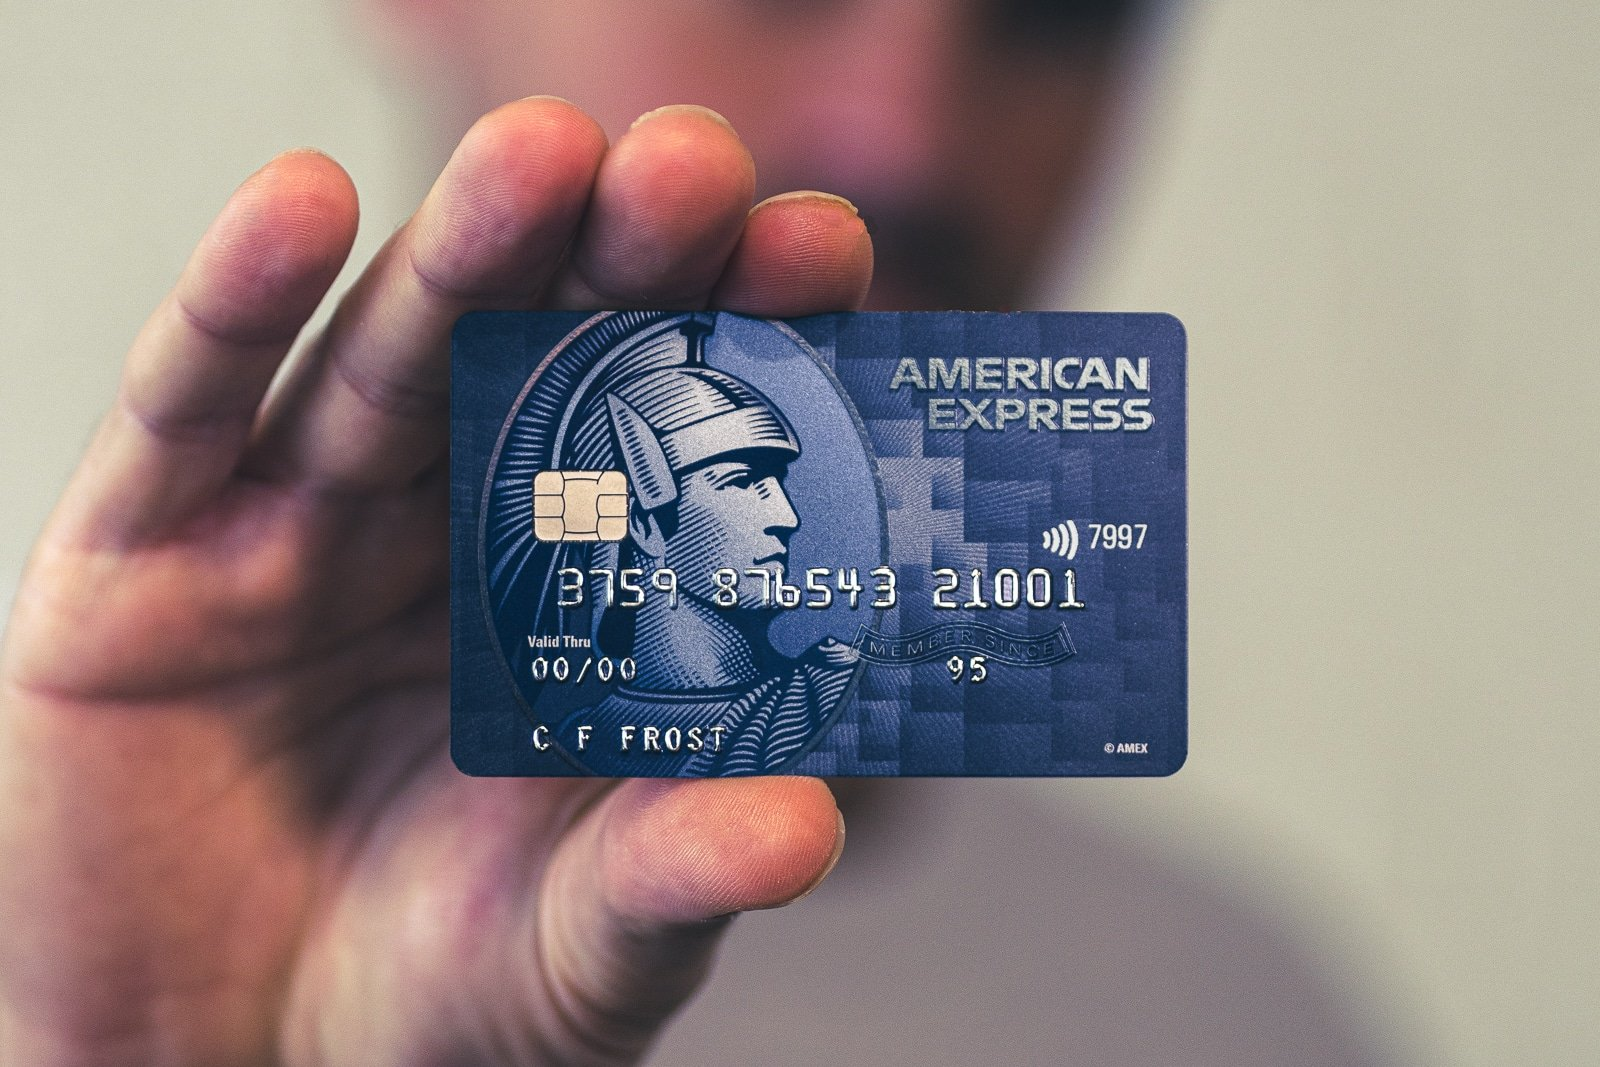

# Table of Contents

1. <a href='#Objectives'>Objectives</a>
2. <a href='#Importing-Libraries-&-Packages'>Importing Libraries & Packages</a>
3. <a href='#Importing-&-Reading-the-Datasets'>Importing & Reading the Datasets</a>
4. <a href='#EDA'>EDA</a>
5. <a href='#Model-Training'>Model Training</a>

## 01.Competition Overview & Objectives

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">
An internationally diversified payments corporation is American Express. They are the biggest payment card issuer in the world, giving clients access to goods, information, and experiences that improve lives and foster economic success.
The goal of this competition is to forecast, based on a customer's monthly customer profile, the likelihood that they won't pay off their credit card bill in the future. You'll use machine learning to predict credit default in this challenge. You will use an industrial size data set specifically to create a machine learning model that competes with the one currently being used in production. Datasets used for training, validation, and testing include anonymised consumer profiles and time-series behavioral data. You are allowed to experiment with any method to produce the most potent model, </p>

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. </p>

<p style="font-family: Arials; font-size: 20px;text-align: center;; font-style: normal;line-height:1.3">
The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories: </P>

- `D_*` = Delinquency variables
- `S_*` = Spend variables
- `P_*` = Payment variables
- `B_*` = Balance variables
- `R_*` = Risk variables

<p style="font-family: Arials; font-size: 20px;; font-style: normal;line-height:1.3">
 With the following features being categorical:`B_30`,`B_38`,`D_114`,`D_116`,`D_117`,`D_120`,`D_126`,`D_63`,`D_64`, `D_66`,`D_68
</P>

<p style="font-family: Arials; font-size: 20px;; font-style: normal;line-height:1.3">Your task is to predict, for each customer_ID, the probability of a future payment default (target = 1).</p>

[<a href="#Table-of-Contents">Back to Top</a>]

# 03.Importing Libraries & Packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from itertools import cycle

import warnings, gc
warnings.filterwarnings('ignore')

[<a href="#Table-of-Contents">Back to Top</a>]

# 04.Importing & Reading the Datasets

In [65]:
df_train = pd.read_feather('../input/amexfeather/train_data.ftr')
df_train = df_train.groupby('customer_ID').tail(1).set_index('customer_ID')

df_test = pd.read_feather('../input/amexfeather/test_data.ftr')
df_test = df_test.groupby('customer_ID').tail(1).set_index('customer_ID')

df_subm = pd.read_csv("../input/amex-default-prediction/sample_submission.csv")

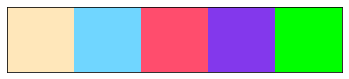

In [66]:
#Custom Color Palette 🎨
custom_colors = ["#ffe7ba","#70d6ff","#ff4d6d","#8338ec","#00ff00"]
custom_Palette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [67]:
df_train_row_count, df_train_column_count=df_train.shape
print('Total amount of rows (Train):', df_train_row_count)
print('Total amount of columns (Train):', df_train_column_count)

Total amount of rows (Train): 458913
Total amount of columns (Train): 190


In [68]:
df_test_row_count, df_test_column_count=df_test.shape
print('Total amount of rows (Test):', df_test_row_count)
print('Total amount of columns (Test):', df_test_column_count)

Total amount of rows (Test): 924621
Total amount of columns (Test): 189


In [69]:
df_train['S_2'] = pd.to_datetime(df_train['S_2'])
df_test['S_2'] = pd.to_datetime(df_test['S_2'])

In [70]:
print('Duration of Train Date: ', df_train['S_2'].min(), df_train['S_2'].max())
print('Duration of Test Date: ', df_test['S_2'].min(), df_test['S_2'].max())

Duration of Train Date:  2018-03-01 00:00:00 2018-03-31 00:00:00
Duration of Test Date:  2019-04-01 00:00:00 2019-10-31 00:00:00


In [71]:
df_train.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,...,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,...,NaN,NaN,0.002981,0.007481,0.007874,NaN,0.003284,0.003170,0.008514,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,2018-03-12,0.880859,0.009705,0.004284,0.812500,0.006451,NaN,0.003796,0.007195,NaN,...,NaN,NaN,0.007381,0.006622,0.000965,NaN,0.002201,0.000834,0.003445,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,2018-03-29,0.621582,0.001082,0.012566,1.005859,0.007828,0.287842,0.004532,0.009941,NaN,...,NaN,NaN,0.002705,0.006184,0.001899,NaN,0.008186,0.005558,0.002983,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,2018-03-30,0.872070,0.005573,0.007679,0.815918,0.001247,NaN,0.000231,0.005527,NaN,...,NaN,NaN,0.002974,0.004162,0.005764,NaN,0.008156,0.006943,0.000905,0


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Columns: 190 entries, S_2 to target
dtypes: category(11), datetime64[ns](1), float16(177), int64(1)
memory usage: 170.2+ MB


In [73]:
cat_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [74]:
feat_Delinquency = [c for c in df_train.columns if c.startswith('D_')]
feat_Spend = [c for c in df_train.columns if c.startswith('S_')]
feat_Payment = [c for c in df_train.columns if c.startswith('P_')]
feat_Balance = [c for c in df_train.columns if c.startswith('B_')]
feat_Risk = [c for c in df_train.columns if c.startswith('R_')]
print(f'Total amount of Delinquency variables: {len(feat_Delinquency)}')
print(f'Total amount of Expenses variables: {len(feat_Spend)}')
print(f'Total amount of Payment variables: {len(feat_Payment)}')
print(f'Total amount of Balance variables: {len(feat_Balance)}')
print(f'Total amount of Risk variables: {len(feat_Risk)}')

Total amount of Delinquency variables: 96
Total amount of Expenses variables: 22
Total amount of Payment variables: 3
Total amount of Balance variables: 40
Total amount of Risk variables: 28


[<a href="#Table-of-Contents">Back to Top</a>]

## 05.EDA

In [75]:
labels=['Delinquency', 'Spend','Payment','Balance','Risk']
values= [len(feat_Delinquency), len(feat_Spend),len(feat_Payment), len(feat_Balance),len(feat_Risk)]

In [76]:
fig_1 = go.Figure()
fig_1.add_trace(go.Pie(values = values,labels = labels,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig_1.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#70d6ff","#ff9770"]),
                  title = dict(text = 'Distribution of Feature'))  
fig_1.show()

In [77]:
df_train.isna().sum()

S_2            0
P_2         2969
D_39           0
B_1            0
B_2           31
           ...  
D_142     378598
D_143       2830
D_144          0
D_145       2830
target         0
Length: 190, dtype: int64

In [78]:
sum(df_train.isna().sum())

12995954

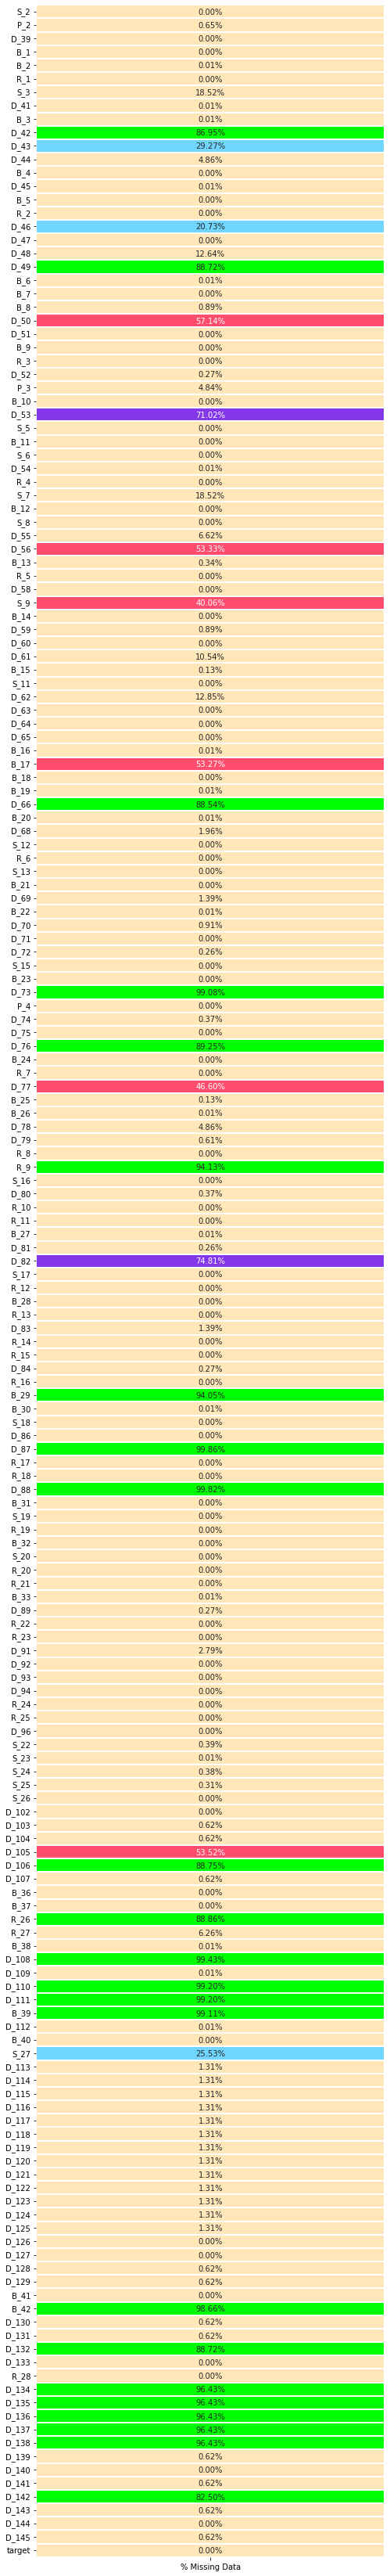

In [79]:
background_color = 'white'
missing = pd.DataFrame(columns = ['% Missing Data'],data = df_train.isnull().sum()/len(df_train))
fig = plt.figure(figsize = (20, 60),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace = 0.5, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
sns.heatmap(missing,cbar = False,annot = True,fmt =".2%", linewidths = 2,cmap = custom_colors,vmax = 1, ax = ax0)
plt.show()

In [80]:
target_class = pd.DataFrame({'count': df_train.target.value_counts(),
                             'percentage': df_train['target'].value_counts() / df_train.shape[0] * 100
})

In [81]:
target_class 

,count,percentage
0,340085,74.106639
1,118828,25.893361


In [82]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo ='label', 
                  showlegend = False,marker = dict(colors =["#9acd32","#87ceeb"]),
                  title = dict(text = 'Distribution of a Target Variable'))  
fig.show()

In [83]:
stat_plot = df_train.reset_index().groupby('S_2')['customer_ID'].nunique().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = stat_plot['S_2'], y = stat_plot['customer_ID']))
fig.update_layout(title="Customer Presences", width = 700, height = 500,xaxis_title ='Presencs Date',
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)') 
fig['data'][0]['line']['color']="#8338ec"
fig.show()

In [84]:
gc.collect()

59345

In [85]:
del_cols = [c for c in df_train.columns if (c.startswith(('D','t'))) & (c not in cat_cols)]
df_del = df_train[del_cols]
spd_cols = [c for c in df_train.columns if (c.startswith(('S','t'))) & (c not in cat_cols)]
df_spd = df_train[spd_cols]
pay_cols = [c for c in df_train.columns if (c.startswith(('P','t'))) & (c not in cat_cols)]
df_pay = df_train[pay_cols]
bal_cols = [c for c in df_train.columns if (c.startswith(('B','t'))) & (c not in cat_cols)]
df_bal = df_train[bal_cols]
ris_cols = [c for c in df_train.columns if (c.startswith(('R','t'))) & (c not in cat_cols)]
df_ris = df_train[ris_cols]

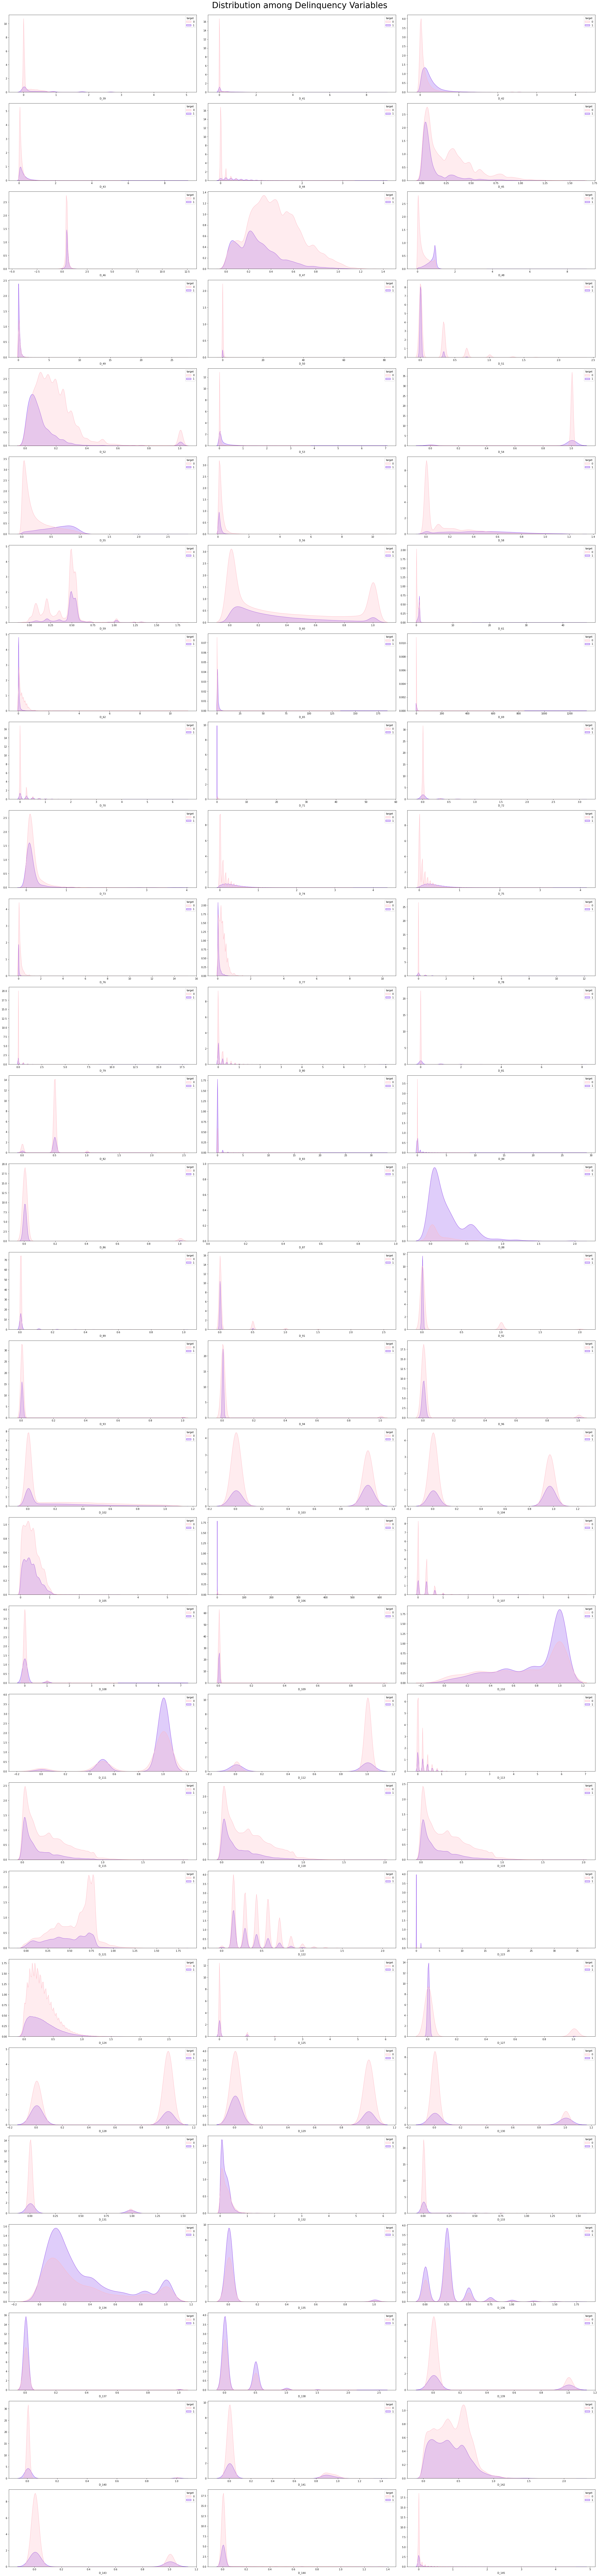

In [86]:
fig, axes = plt.subplots(29, 3, figsize = (35,150))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(del_cols) - 1:
        sns.kdeplot(x = del_cols[i], hue='target', data = df_del, fill = True, ax = ax, palette =["#ffb6c1","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
fig.suptitle('Distribution among Delinquency Variables', fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

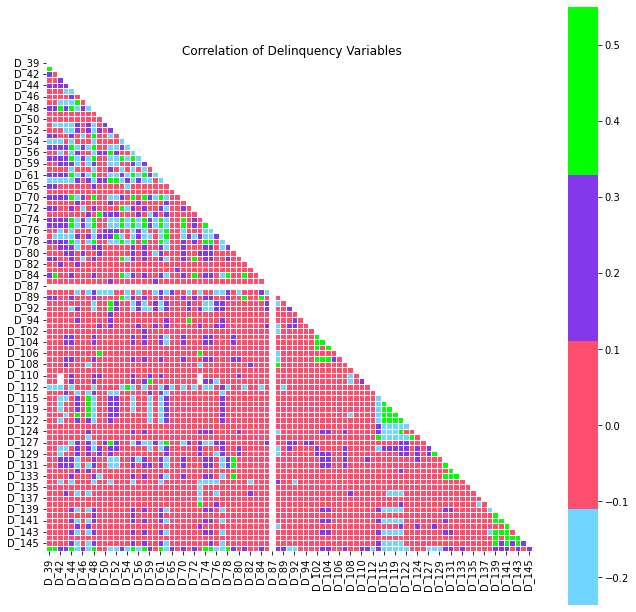

In [87]:
plt.figure(figsize =(11,11))
corr = df_del.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Delinquency Variables')
plt.show()

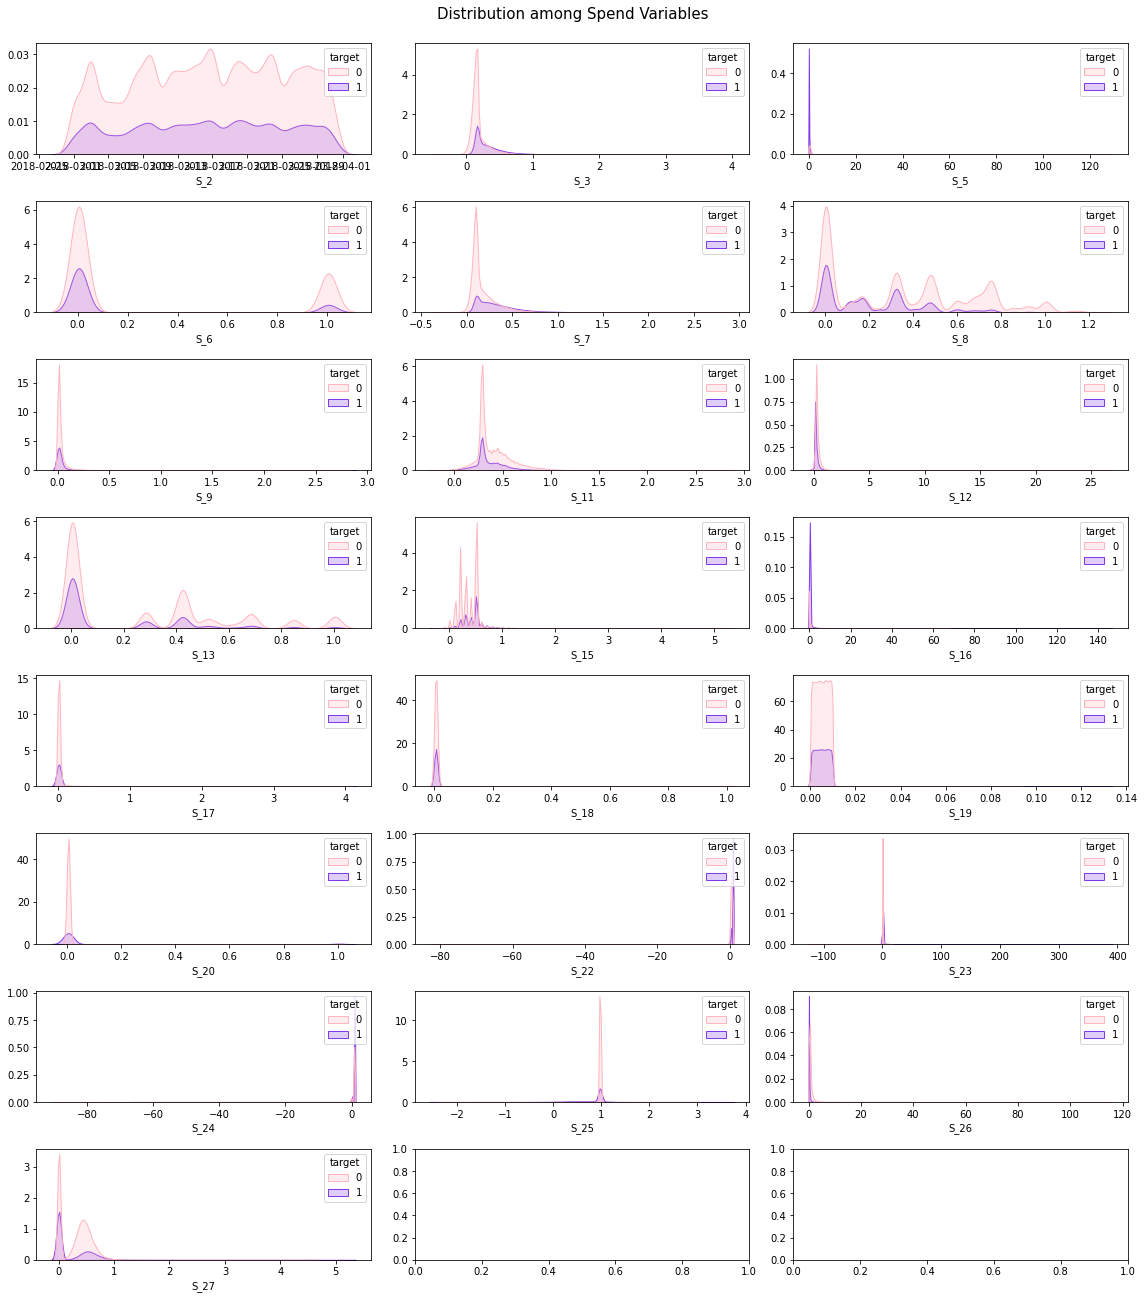

In [88]:
fig, axes = plt.subplots(8, 3, figsize = (16,18))
fig.suptitle('Distribution among Spend Variables', fontsize = 15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(spd_cols) - 1:
        sns.kdeplot(x = spd_cols[i], hue ='target', data = df_spd, fill = True, ax = ax, palette =["#ffb6c1","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [89]:
S_cols = [c for c in df_train.columns if (c.startswith(('S')))]
df_S = df_train[S_cols]

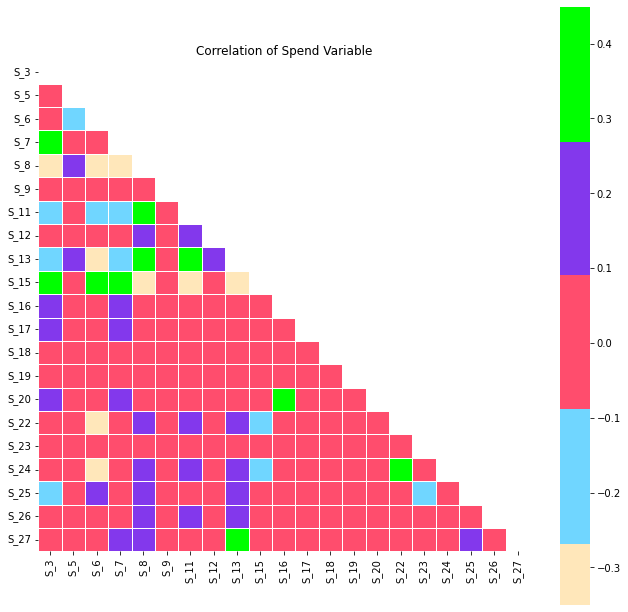

In [90]:
plt.figure(figsize = (11,11))
corr = df_S.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Spend Variable')
plt.show()

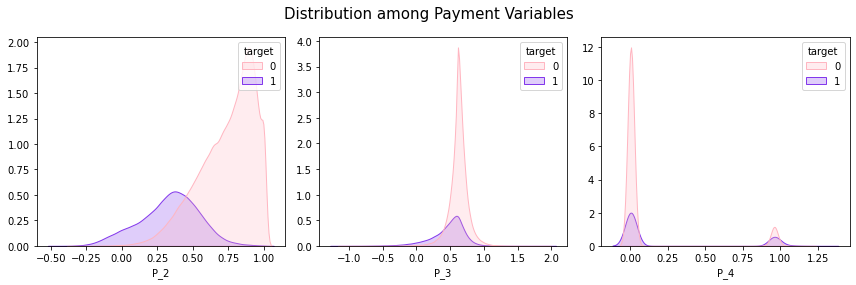

In [91]:
fig, axes = plt.subplots(1, 3, figsize = (12,4))
fig.suptitle('Distribution among Payment Variables',fontsize = 15)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(pay_cols) - 1:
        sns.kdeplot(x = pay_cols[i], hue ='target', data = df_pay, fill = True, ax = ax, palette =["#ffb6c1","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [92]:
P_cols = [c for c in df_train.columns if (c.startswith(('P')))]
df_P = df_train[P_cols]

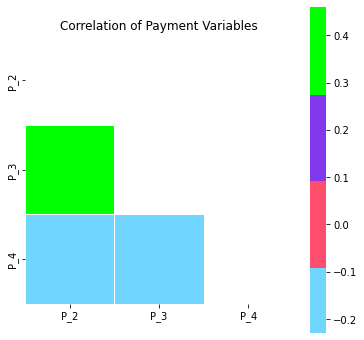

In [93]:
plt.figure(figsize = (6,6))
corr = df_P.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, linewidths = .6, cmap = custom_colors)
plt.title('Correlation of Payment Variables')
plt.show()

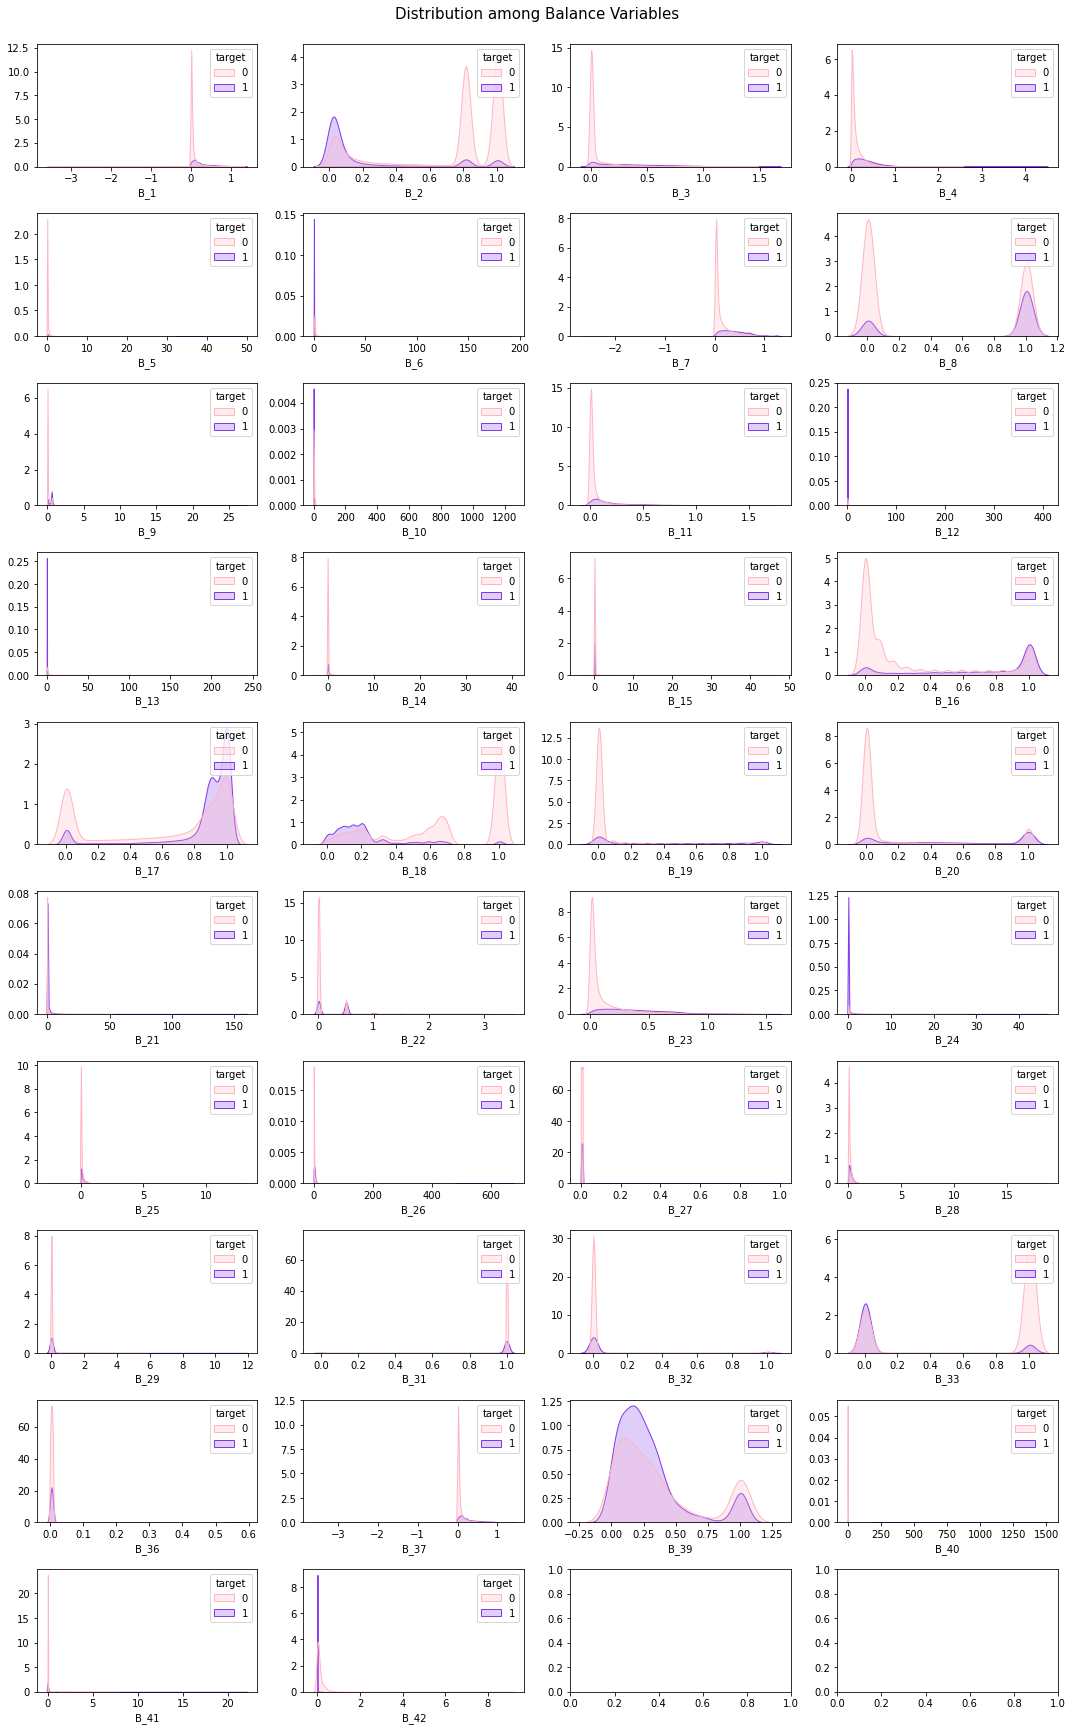

In [94]:
fig, axes = plt.subplots(10, 4, figsize = (15,24))
fig.suptitle('Distribution among Balance Variables',fontsize = 15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(bal_cols) - 1:
        sns.kdeplot(x = bal_cols[i], hue ='target', data = df_bal, fill = True, ax = ax, palette =["#ffb6c1","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [95]:
B_cols = [c for c in df_train.columns if (c.startswith(('B')))]
df_B = df_train[B_cols]

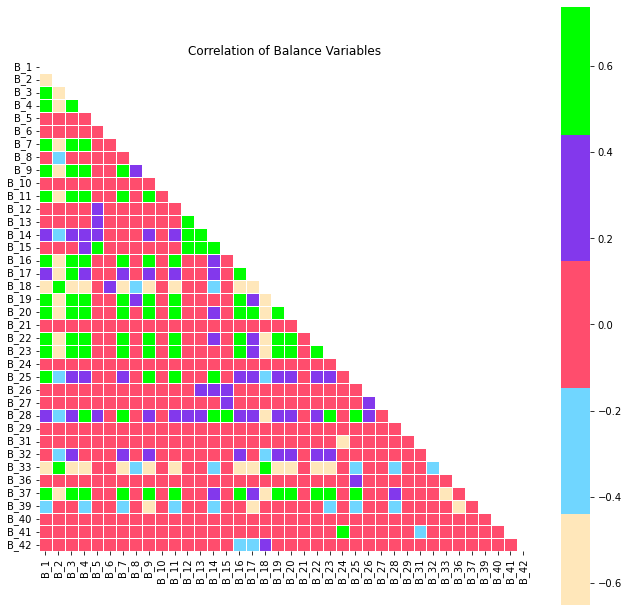

In [96]:
plt.figure(figsize = (11,11))
corr = df_B.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, robust=True, center = 0,square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Balance Variables')
plt.show()

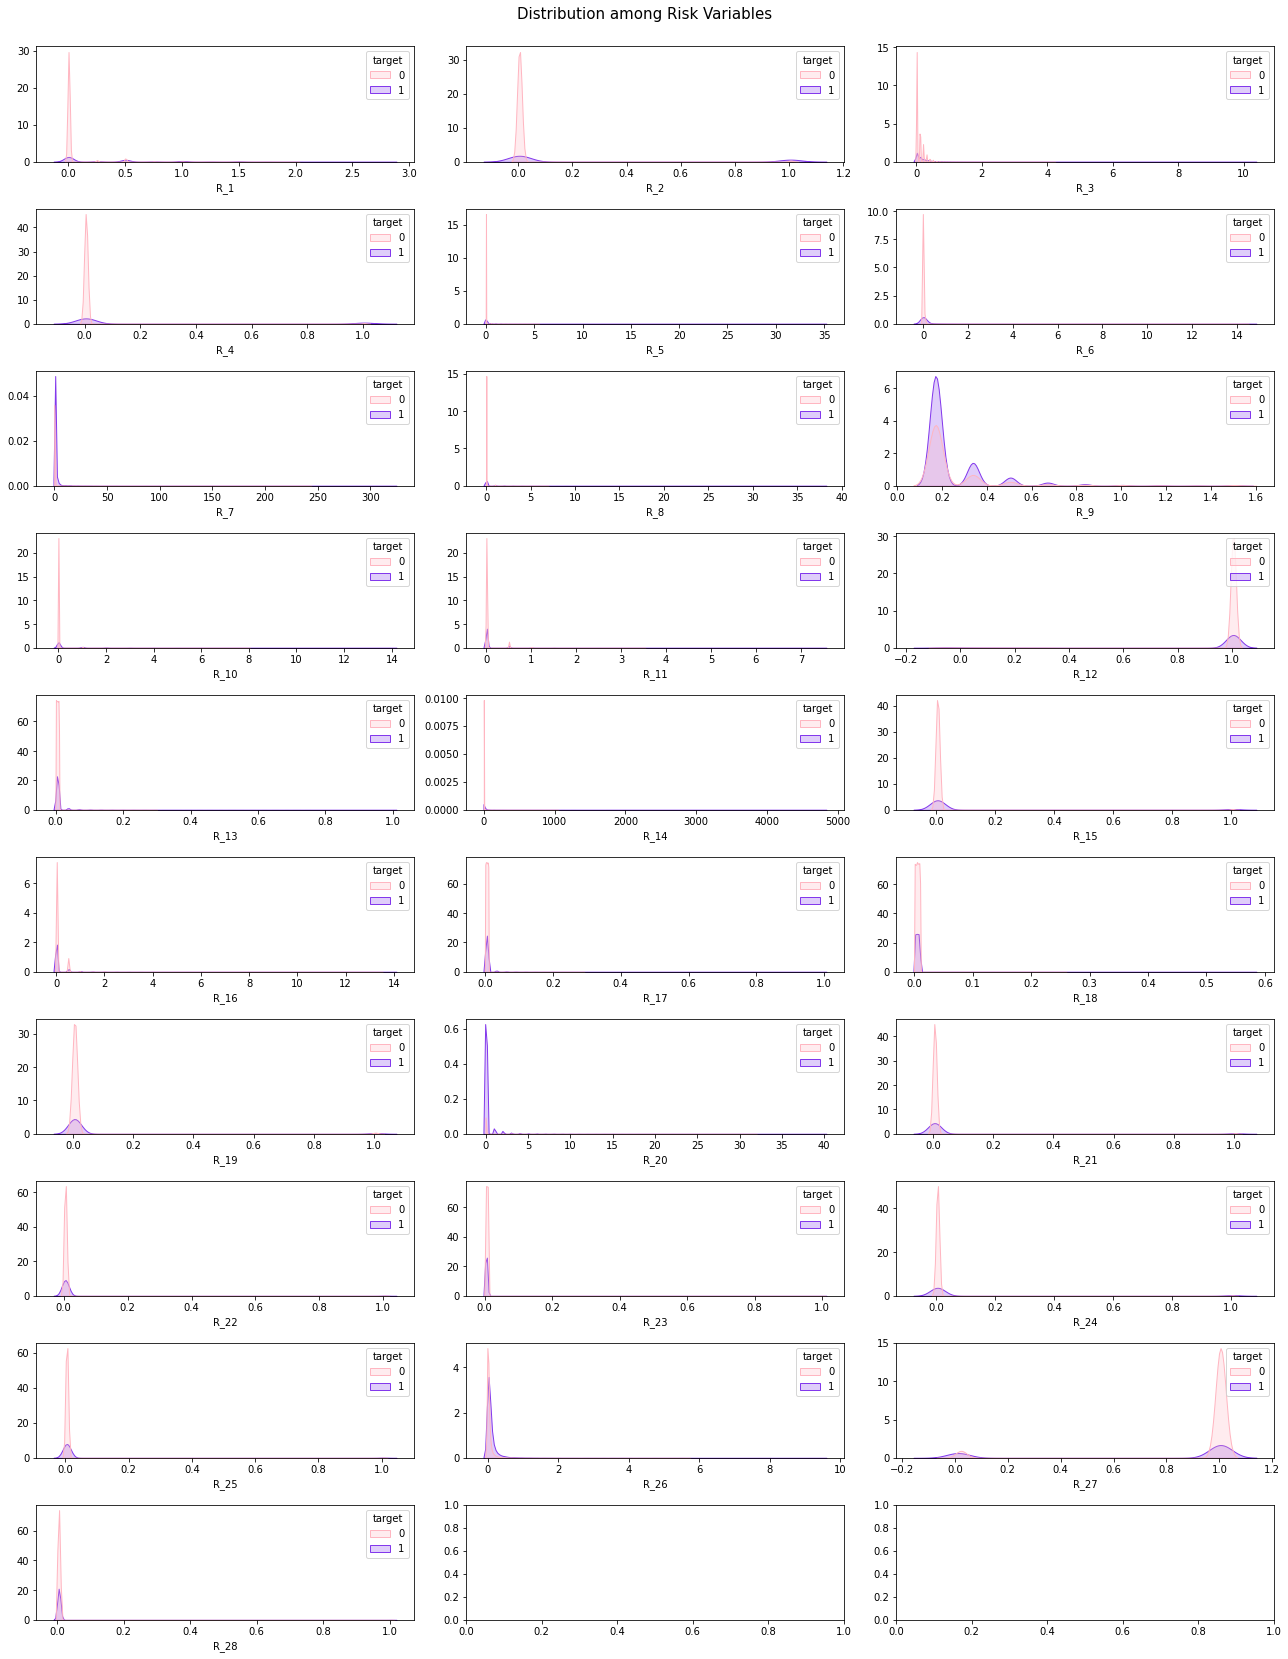

In [97]:
fig, axes = plt.subplots(10, 3, figsize = (18,23))
fig.suptitle('Distribution among Risk Variables',fontsize=15, x = 0.5, y = 1)
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(ris_cols) - 1:
        sns.kdeplot(x = ris_cols[i], hue ='target', data = df_ris, fill = True, ax = ax, palette =["#ffb6c1","#8338ec"])
        ax.tick_params()
        ax.xaxis.get_label()
        ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [98]:
R_cols = [c for c in df_train.columns if (c.startswith(('R')))]
df_R = df_train[R_cols]

In [ ]:
plt.figure(figsize=(11,11))
corr = df_R.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, square = True, linewidths =.6, cmap = custom_colors)
plt.title('Correlation of Risk Variables')
plt.show()

In [ ]:
palette = cycle(["#ffe7ba","#70d6ff","#ff4d6d","#8338ec","#00ff00"])
targ = df_train.corrwith(df_train['target'], axis=0)
val = [str(round(v ,1) *100) + '%' for v in targ.values]
fig = go.Figure()
fig.add_trace(go.Bar(y=targ.index, x= targ.values, orientation='h',text = val, marker_color = next(palette)))
fig.update_layout(title = "Correlation of variables with Target",width = 750, height = 3500,
                  paper_bgcolor='rgb(0,0,0,0)',plot_bgcolor='rgb(0,0,0,0)')

In [ ]:
gc.collect()

[<a href="#Table-of-Contents">Back to Top</a>]

# 06.Model Training

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for cat_feat in cat_cols:
    df_train[cat_feat] = lab_enc.fit_transform(df_train[cat_feat])
    df_test[cat_feat] = lab_enc.transform(df_test[cat_feat])

In [ ]:
#Reference: https://www.kaggle.com/code/inversion/amex-competition-metric-python/notebook
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [ ]:
# define dataset
X = df_train.drop('target', axis=1)
y = df_train['target']

In [ ]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations = 3000, random_state = 42, nan_mode ='Min',task_type ="GPU")
clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], cat_features=cat_cols,  verbose = 100)
preds = clf.predict_proba(X_test)[:, 1]

In [ ]:
y_preds = clf.predict_proba(df_test)[:, 1]
y_preds

In [ ]:
df_subm["prediction"] = y_preds
df_subm.to_csv('submission_catb.csv', index=False)
df_subm

[<a href="#Table-of-Contents">Back to Top</a>]

# **Thank You!**